### Creator - Aditya S. Yadav

## Importing Necessary Libaries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Binarizer

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [115]:
df = pd.read_csv('Titanic-Dataset (2).csv')

In [116]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S


In [117]:
df.shape

(891, 12)

In [118]:
df.duplicated().sum()

0

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Imputing Mean Age for null values in Age Column

In [122]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

### Dropping Cabin, Name, Ticket and PassengerId due to numerous categories/observations

In [123]:
df['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

## Dropping The columns with numerous category and null values

In [124]:
df['Name'].nunique()

891

In [125]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [126]:
df.drop(['Cabin','PassengerId','Name','Ticket'],inplace=True,axis=1)

In [127]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [128]:
heat = df.corr(numeric_only=True)

In [129]:
heat

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

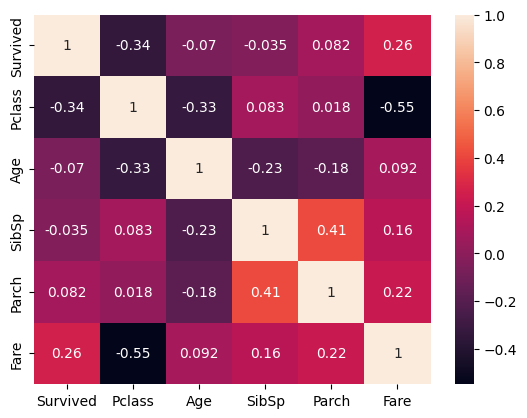

In [130]:
sns.heatmap(heat,annot=True)

In [131]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

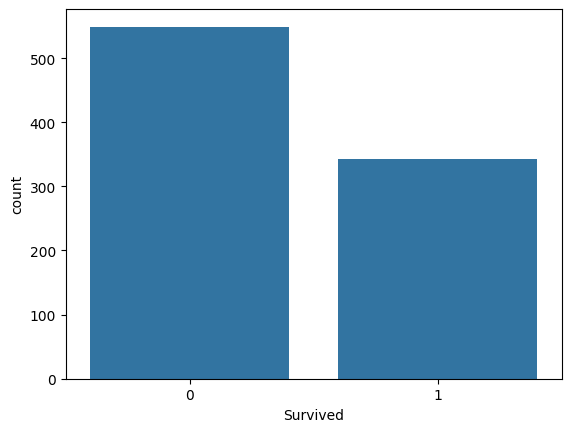

In [132]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: ylabel='count'>

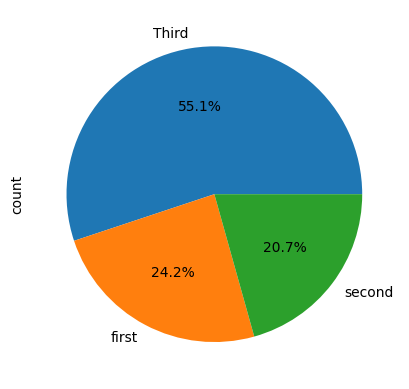

In [133]:
print(df['Pclass'].value_counts())
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Third','first','second'])

## from above we conclude that most of the people where travelling from 3rd class

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

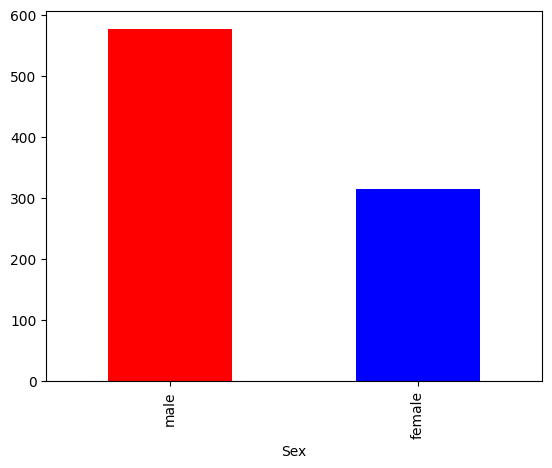

In [134]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='bar',color=['red','blue'])

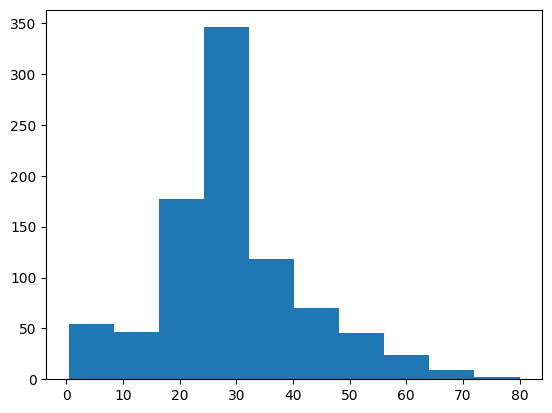

In [135]:
plt.hist(x='Age',data=df)
plt.show()

## Combining SibSp and Parch as Travelling_with column

In [136]:
df['Travelling_with'] = df['SibSp'] + df['Parch']

In [137]:
df['Travelling_with'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [138]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)

In [139]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelling_with
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [140]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

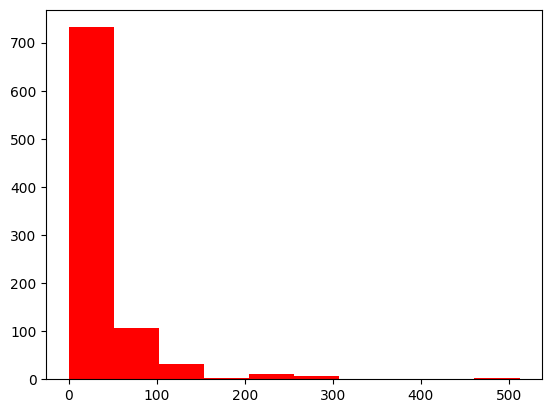

In [141]:
plt.hist(x='Fare',data=df,color='red')
plt.show()

## Fare is right skewed later we will perform Powertransformer

<Axes: ylabel='count'>

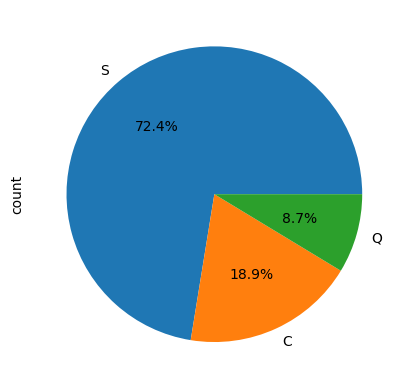

In [142]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## From above we can say most of the people boarded the ship from Southamptom

Travelling_with
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64


<Axes: xlabel='Travelling_with', ylabel='count'>

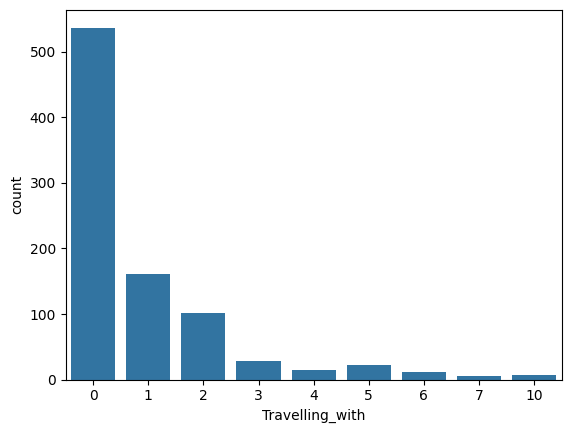

In [143]:
print(df['Travelling_with'].value_counts())
sns.countplot(x='Travelling_with',data=df)

## From above we can say that most of the people where travelling alone 

In [144]:
df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelling_with
0,0,3,male,22.0,7.25,S,1


## Preprocessing Tasks

## Spliting the data into Features and Labelled Data

In [145]:
X = df.drop(['Survived'],axis=1)
y= df['Survived']

In [146]:
X

,Pclass,Sex,Age,Fare,Embarked,Travelling_with
0,3,male,22.000000,7.2500,S,1
1,1,female,38.000000,71.2833,C,1
2,3,female,26.000000,7.9250,S,0
3,1,female,35.000000,53.1000,S,1
4,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,S,0
887,1,female,19.000000,30.0000,S,0
888,3,female,29.699118,23.4500,S,3
889,1,male,26.000000,30.0000,C,0


In [147]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Spliting the data into Training and Testing Data

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=128)

In [149]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Travelling_with
379,3,male,19.000000,7.7750,S,0
836,3,male,21.000000,8.6625,S,0
468,3,male,29.699118,7.7250,Q,0
142,3,female,24.000000,15.8500,S,1
64,1,male,29.699118,27.7208,C,0


In [150]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Travelling_with
864,2,male,24.000000,13.0000,S,0
132,3,female,47.000000,14.5000,S,1
373,1,male,22.000000,135.6333,C,0
776,3,male,29.699118,7.7500,Q,0
300,3,female,29.699118,7.7500,Q,0


In [151]:
y_train.head()

379    0
836    0
468    0
142    1
64     0
Name: Survived, dtype: int64

## Using ColumnTransformer to perform various tasks as defined earlier

In [152]:
trf1 = ColumnTransformer([
    ('plcass',OrdinalEncoder(categories=[['1','2','3']]),[0])],
                         remainder='passthrough')

In [153]:
trf2 = ColumnTransformer([
    ('sex_embark',OneHotEncoder(sparse_output=False),[1,4])],
                         remainder='passthrough')

In [154]:
# trf3 = ColumnTransformer([
#     ('age',SimpleImputer(),[2])],
#                          remainder='passthrough')   

In [155]:
trf4 = ColumnTransformer([
    ('fare',PowerTransformer(),[3])],
                         remainder='passthrough')     

In [156]:
trf5 = ColumnTransformer([
    ('travelling_wit',Binarizer(copy=False),[5])],
                         remainder='passthrough')   

In [157]:
trf6 = ColumnTransformer([
    ('Scaled',StandardScaler(),slice(0,11))],
                         remainder='passthrough')

In [158]:
trf7 = LogisticRegression()

In [159]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    # ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5),
    ('trf6',trf6),
    ('trf7',trf7)
])

In [160]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('plcass',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3']]),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_embark',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 4])])),
                ('trf4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fare', PowerTransformer(),
                                                  [3])])),
                ('trf5',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('travelling_wit',
                                                  Binarizer(copy=False),
                                                  [5])])),
                ('trf6',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaled', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('trf7', LogisticRegression())])

In [161]:
y_pred = pipe.predict(X_test)

In [162]:
print(accuracy_score(y_test,y_pred))

0.8044692737430168


In [163]:
from sklearn.model_selection import cross_val_score

### Cross Validation Score 

In [164]:
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

In [165]:
print("Mean Accuracy:", np.mean(cv_scores))

Mean Accuracy: 0.7879040863724813


## Model Testing with new Data

In [166]:
Data = {'Pclass':[1],'Sex':['female'],'Age':[20],'Fare':[10],'Embarked':['S'],'Travelling_with':[5]}
data = pd.DataFrame(Data)     

In [167]:
survived = pipe.predict(data)
print('Survival of a person:',survived[0])

Survival of a person: 1
